In [1]:
import numpy as np
import matplotlib.pyplot as plt
from main_funcs import Jacobi, Legendre, Chebyshev, Hermite, Fourier
from tqdm import tqdm

e:\File_VSCode\M3R\m3r_venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Signed area

In [2]:
t_arr = np.linspace(0, 2*np.pi, 100)
x_arr = np.sin(t_arr)+3

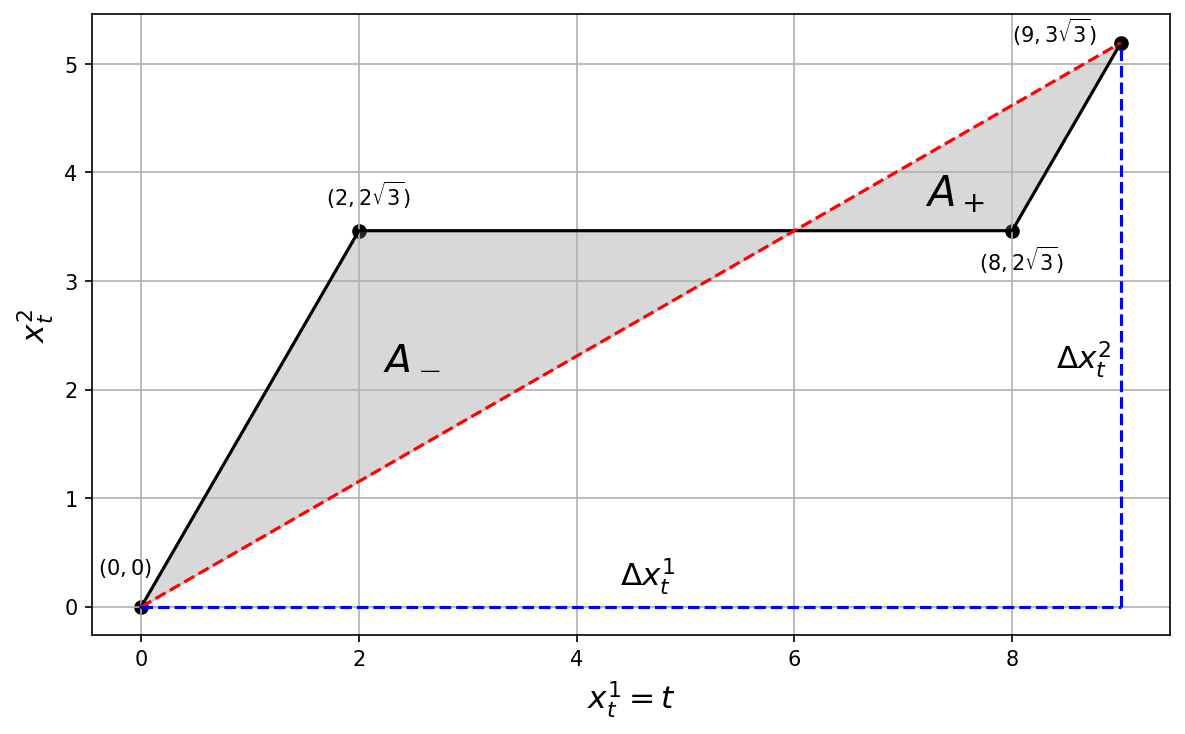

In [3]:
plt.figure(figsize=(8, 5), dpi=150)
plt.plot((0, 2, 8, 9), (0, 2*3**0.5, 2*3**0.5, 3*3**0.5), c='black')
plt.plot((0, 9), (0, 3*3**0.5), color='red', linestyle='dashed')
plt.scatter((0, 2, 8, 9), (0, 2*3**0.5, 2*3**0.5, 3*3**0.5), c='black')
plt.fill_between((0, 2, 8, 9), (0, 2*3**0.5, 2*3**0.5, 3*3**0.5), (0, 2/3**0.5, 2*3**0.5+2/3**0.5, 3*3**0.5),
                 facecolor="orange", # The fill color
                 color='grey',       # The outline color
                 alpha=0.3)
plt.hlines(0, 0, 9, colors='b', linestyles='dashed')
plt.vlines(9, 0, 3*3**0.5, colors='b', linestyles='dashed')
plt.annotate(r'$(0, 0)$', (-0.4, 0.3))
plt.annotate(r'$(2, 2\sqrt{3})$', (1.7, 3.7))
plt.annotate(r'$(8, 2\sqrt{3})$', (7.7, 3.1))
plt.annotate(r'$(9, 3\sqrt{3})$', (8, 5.2))
plt.annotate(r'$\Delta x_t^1$', (4.4, 0.2), fontsize=15)
plt.annotate(r'$\Delta x_t^2$', (8.4, 2.2), fontsize=15)
plt.annotate(r'$A_-$', (2.2, 2.2), fontsize=20)
plt.annotate(r'$A_+$', (7.2, 3.7), fontsize=20)
plt.ylabel(r'$x^2_t$', fontsize=15)
plt.xlabel(r'$x^1_t=t$', fontsize=15)
plt.grid()
plt.tight_layout()
plt.savefig('signed_area.pdf')

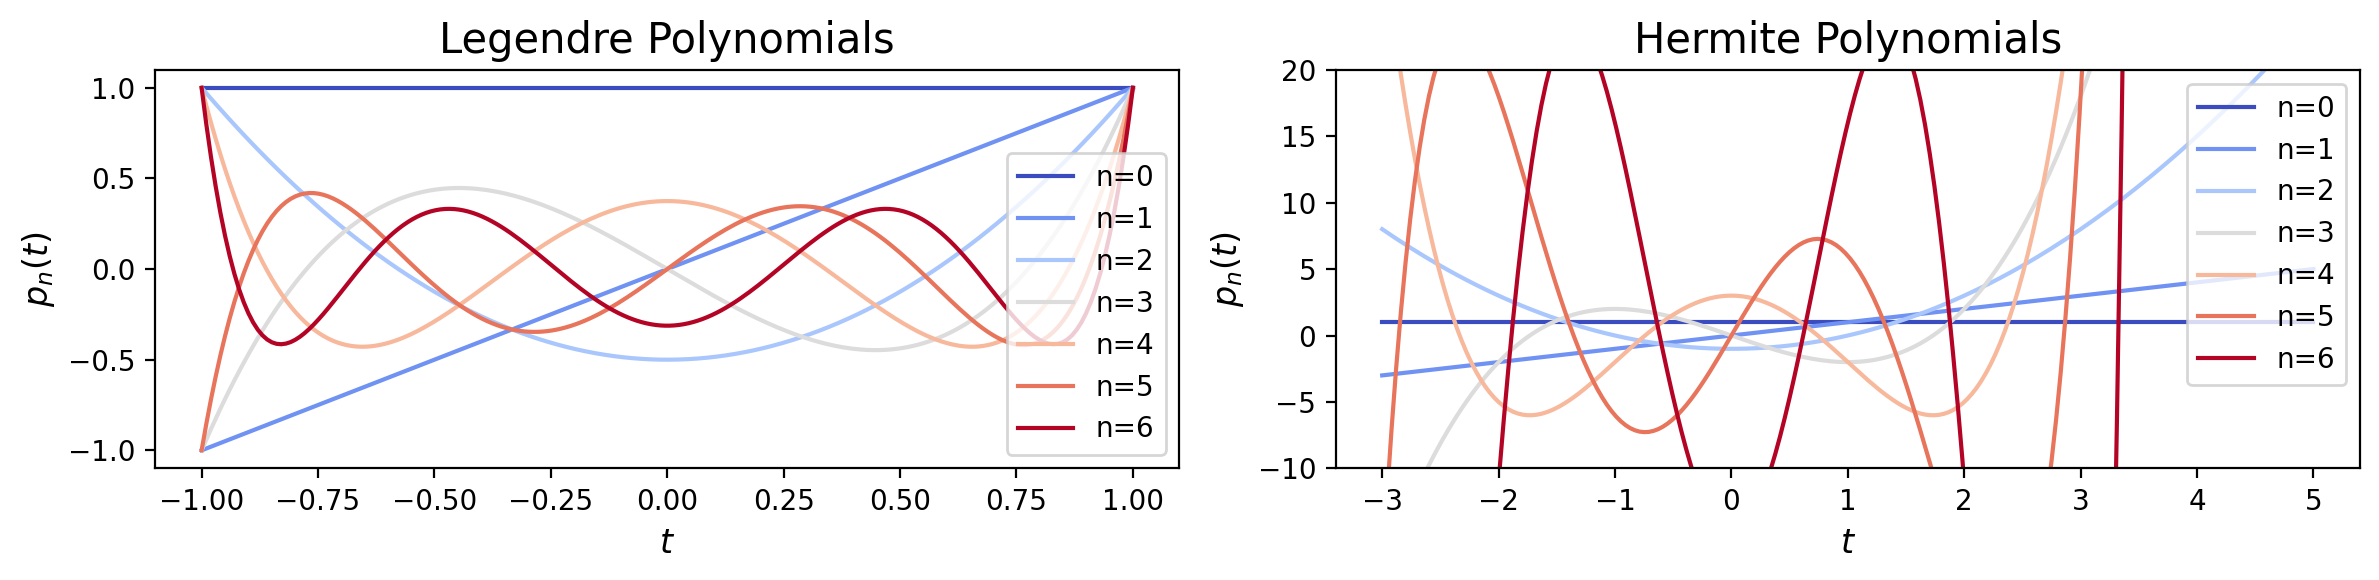

In [4]:
N = 7
cmap = plt.get_cmap('coolwarm')
colors = cmap(np.linspace(0, 1, N))

plt.figure(figsize=(12, 3), dpi=200)
plt.subplot(1, 2, 1)
t_grid = np.linspace(-1, 1, 200)
poly = Legendre()
for n in range(N):
    plt.plot(t_grid, poly.P(n)(t_grid), color=colors[n], label=f'n={n}')
plt.legend(loc='best')
plt.title('Legendre Polynomials', fontsize=15)
plt.xlabel(r'$t$', fontsize=12)
plt.ylabel(r'$p_n(t)$', fontsize=12)
plt.subplot(1, 2, 2)
t_grid = np.linspace(-3, 5, 200)
poly = Hermite(0, 1)
for n in range(N):
    plt.plot(t_grid, poly.P(n)(t_grid), color=colors[n], label=f'n={n}')
plt.ylim(-10, 20)
plt.legend(loc='upper right')
plt.title('Hermite Polynomials', fontsize=15)
plt.xlabel(r'$t$', fontsize=12)
plt.ylabel(r'$p_n(t)$', fontsize=12)
plt.tight_layout()
plt.savefig('orthopoly.pdf')

### error estimates of Orthogonal polynomials and Fourier

In [99]:
N=15
length = 105
t_grid = np.linspace(-1, 1, length)
def x1_(t):
    return np.cos(10*t) - np.sin(5*t)
def x1(t):
    return x1_(t) - x1_(-1)
def x2_(t):
    return np.sin(10*t) + np.exp(2*t) - t #np.where(t % 1 < 0.5, 1, -1)
def x2(t):
    return x2_(t) - x2_(-1)
def x3_(t):
    return 2 * np.abs(2 * (t % 1) - 1) - 1
def x3(t):
    return x3_(t) - x3_(-1)

cmap = plt.get_cmap('coolwarm')
colors = cmap(np.linspace(0, 1, N))
n_arr = np.arange(2, N)

100%|██████████| 15/15 [00:00<00:00, 157.90it/s]


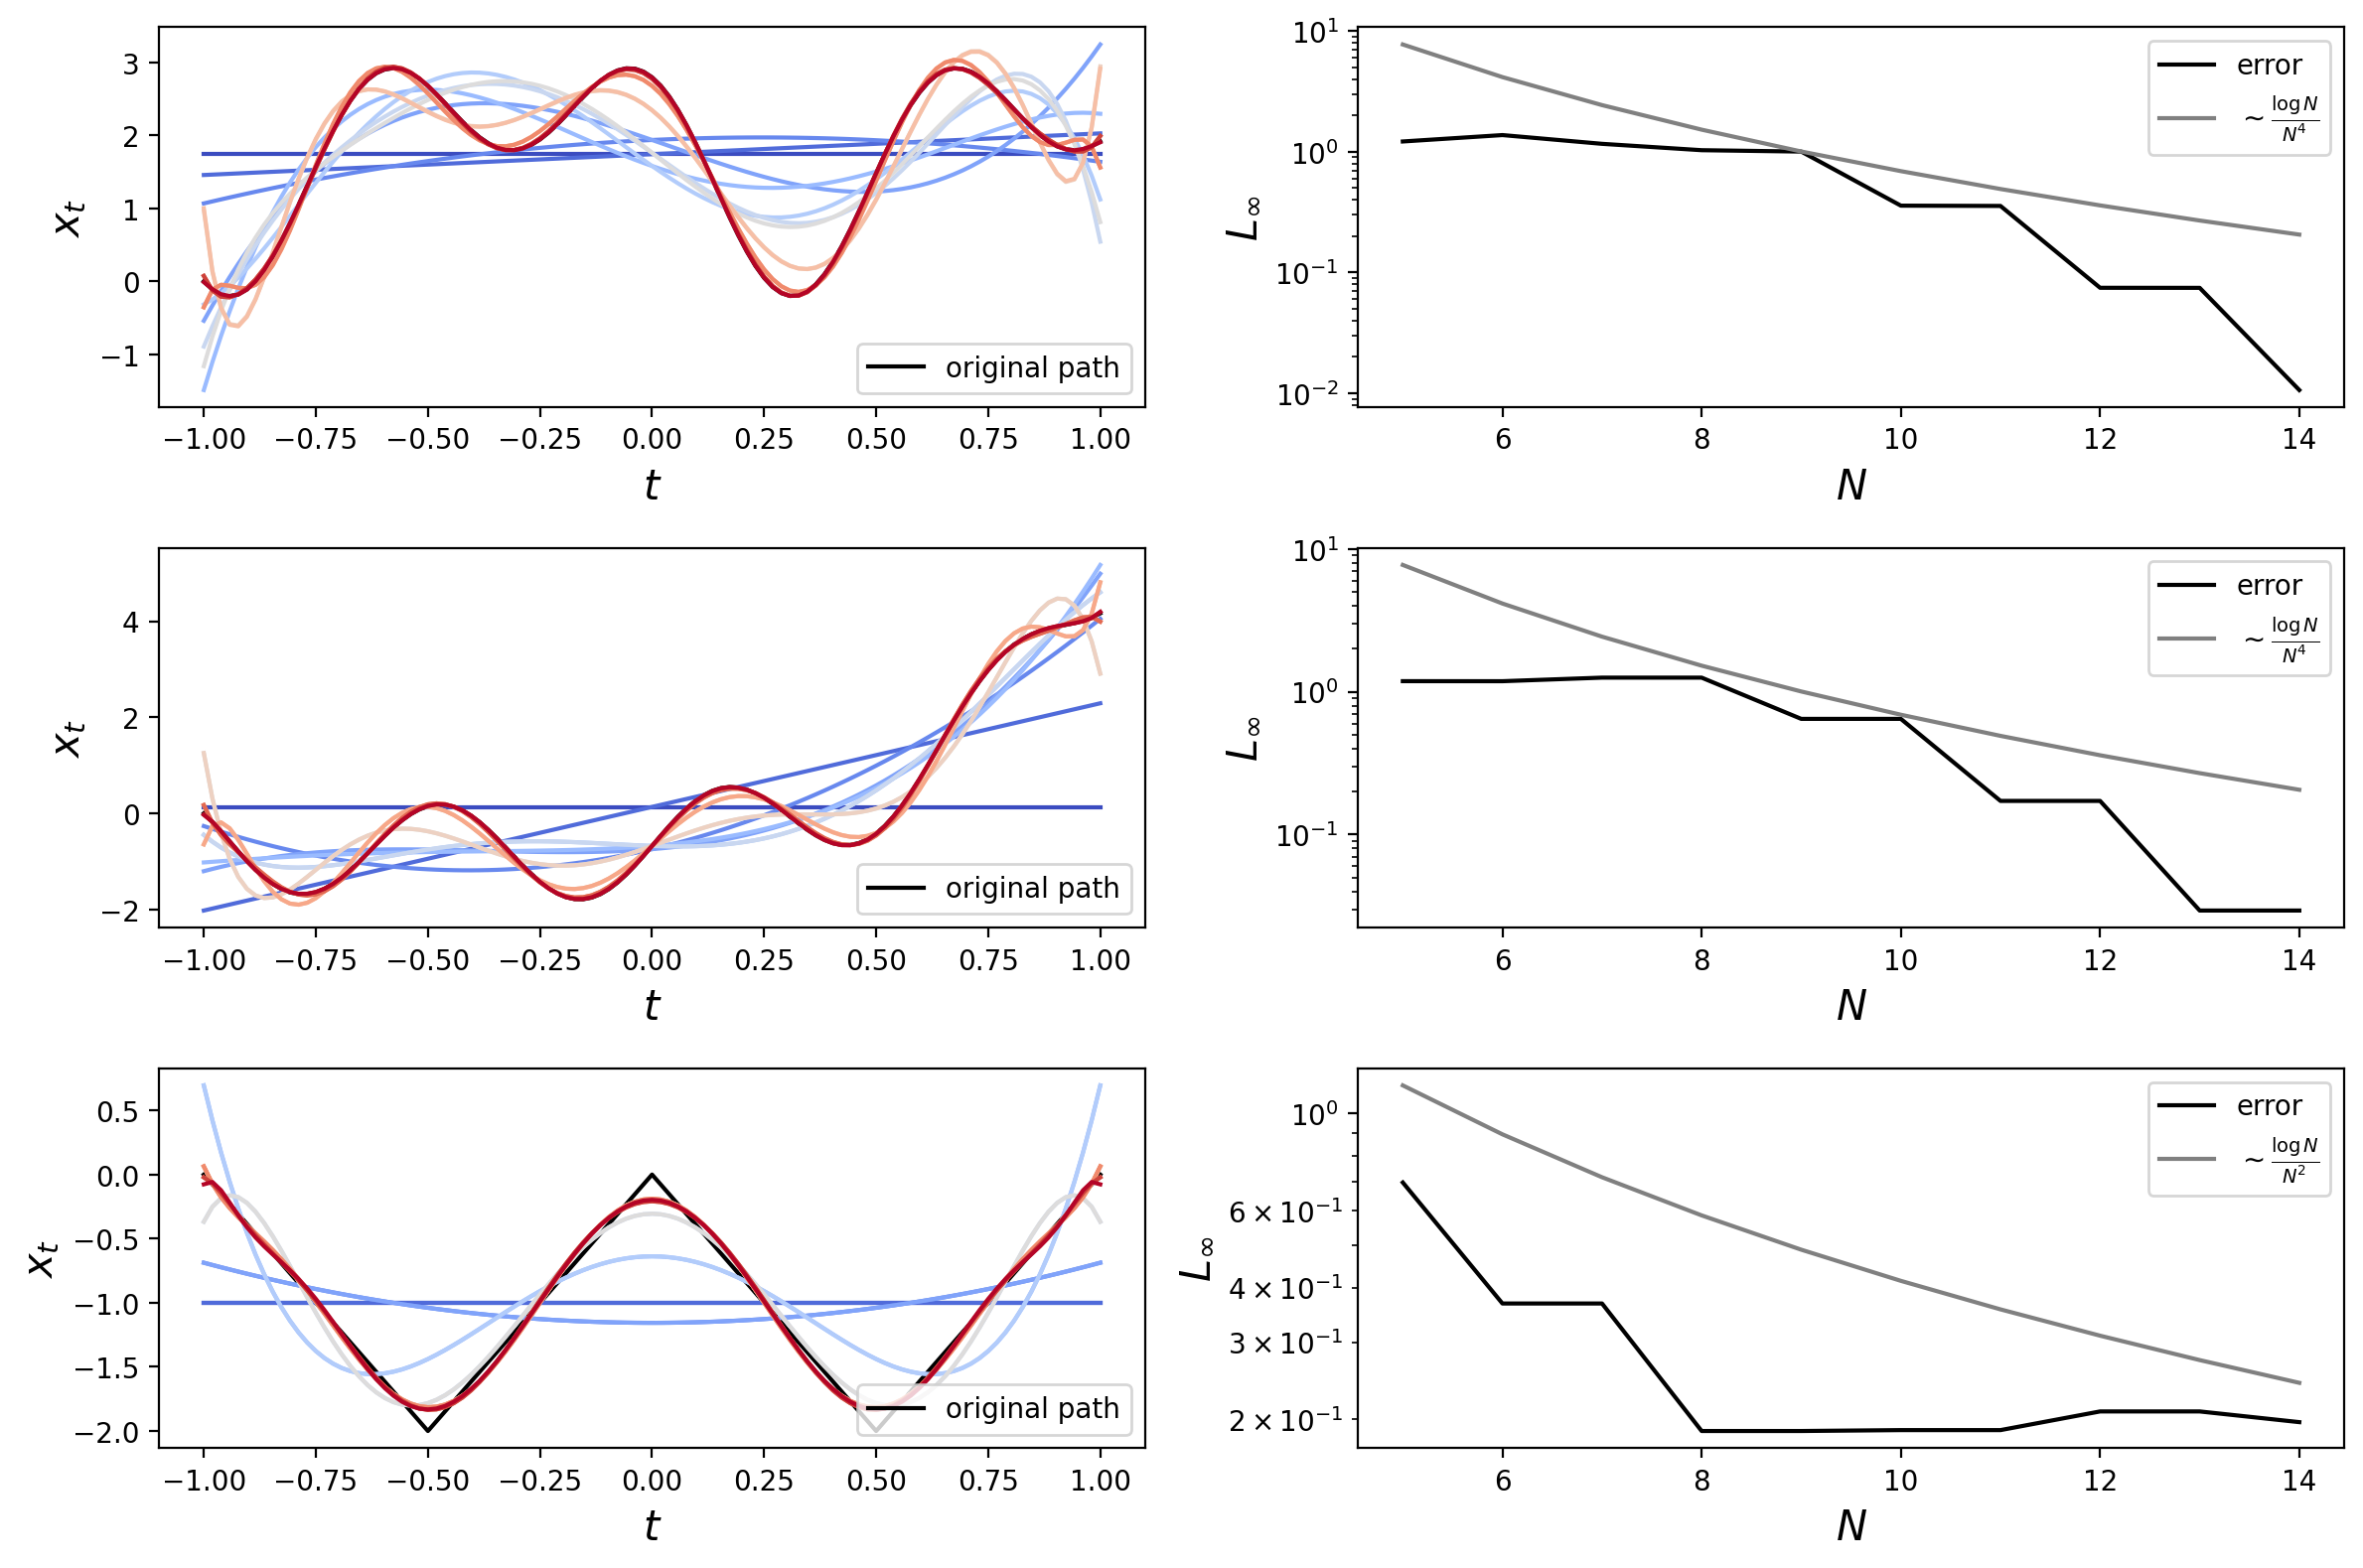

In [138]:
poly = Legendre()
plt.figure(figsize=(12, 8), dpi=200)

plt.subplot(3, 2, 1)
plt.plot(t_grid, x1(t_grid), color='black', label='original path')
for n in tqdm(range(N)):
    plt.plot(t_grid, poly.ploy2path(x1, n, t_grid), color=colors[n])
plt.xlabel(r'$t$', fontsize=15)
plt.ylabel(r'$x_t$', fontsize=15)
plt.legend(loc='lower right')

plt.subplot(3, 2, 2)
plt.plot(n_arr, [np.max(np.abs(poly.ploy2path(x1, n, t_grid)-x1(t_grid))) for n in n_arr], color='black', label='error')
plt.plot(n_arr, 3000*np.log(n_arr)/n_arr**4, color='grey', label=r'$\sim\frac{\log N}{N^4}$')
plt.yscale('log')
plt.xlabel(r'$N$', fontsize=15)
plt.ylabel(r'$L_{\infty}$', fontsize=15)
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(t_grid, x2(t_grid), color='black', label='original path')
for n in tqdm(range(N)):
    plt.plot(t_grid, poly.ploy2path(x2, n, t_grid), color=colors[n])
plt.xlabel(r'$t$', fontsize=15)
plt.ylabel(r'$x_t$', fontsize=15)
plt.legend(loc='lower right')

plt.subplot(3, 2, 4)
plt.plot(n_arr, [np.max(np.abs(poly.ploy2path(x2, n, t_grid)-x2(t_grid))) for n in n_arr], color='black', label='error')
plt.plot(n_arr, 3000*np.log(n_arr)/n_arr**4, color='grey', label=r'$\sim\frac{\log N}{N^4}$')
plt.yscale('log')
plt.xlabel(r'$N$', fontsize=15)
plt.ylabel(r'$L_{\infty}$', fontsize=15)
plt.legend()

plt.subplot(3, 2, 5)
plt.plot(t_grid, x3(t_grid), color='black', label='original path')
for n in tqdm(range(N)):
    plt.plot(t_grid, poly.ploy2path(x3, n, t_grid), color=colors[n])
plt.xlabel(r'$t$', fontsize=15)
plt.ylabel(r'$x_t$', fontsize=15)
plt.legend(loc='lower right')

plt.subplot(3, 2, 6)
plt.plot(n_arr, [np.max(np.abs(poly.ploy2path(x3, n, t_grid)-x3(t_grid))) for n in n_arr], color='black', label='error')
plt.plot(n_arr, 18*np.log(n_arr)/n_arr**2, color='grey', label=r'$\sim\frac{\log N}{N^2}$')
plt.yscale('log')
plt.xlabel(r'$N$', fontsize=15)
plt.ylabel(r'$L_{\infty}$', fontsize=15)
plt.legend()
plt.tight_layout()
plt.savefig('orthopoly_convergence.pdf')
plt.show()